In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 

np.random.seed(1)
plt.style.use('seaborn')

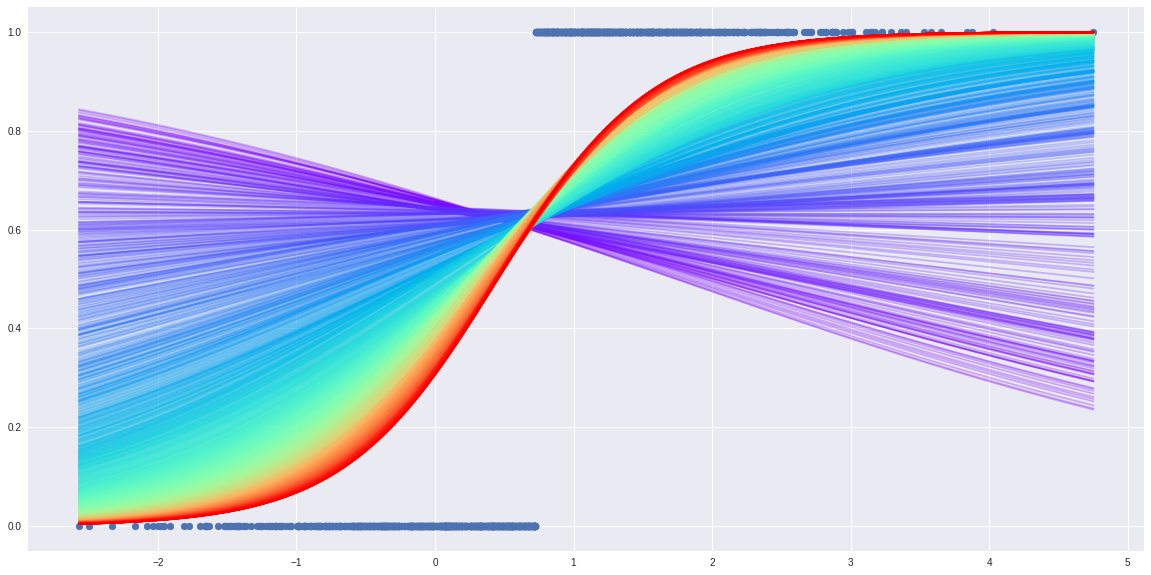

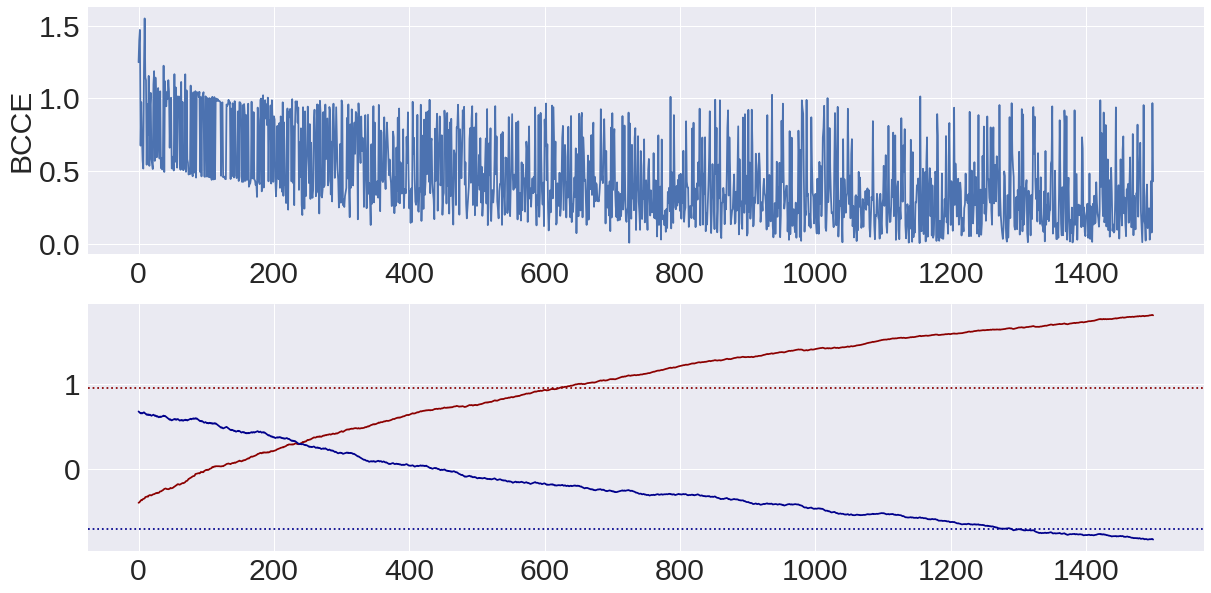

In [15]:
# set params
N = 1500
lr = 0.01
t_w = np.random.uniform(-3, 3, (1, ))
t_b = np.random.uniform(-3, 3, (1, ))

# t_w, t_b = 1, 0

W = np.random.uniform(-3, 3, (1, ))
b = np.random.uniform(-3, 3, (1, ))

# generate dataset 
db = -t_b / t_w
x_data = np.random.normal(db, 1, size=(N, ))  # avoid generating biased data
y_data = x_data * t_w + t_b
y_data = (x_data > db).astype(np.int)

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x_data, y_data)

x_range = np.linspace(x_data.min(), x_data.max(), N)
w_track, b_track, J_track = list(), list(), list()
cmap = cm.get_cmap('rainbow', lut=N)


# training
for data_idx, (x, y) in enumerate(zip(x_data, y_data)):
    w_track.append(W)
    b_track.append(b)

    # visualize updated model 
    y_range = W * x_range + b 
    y_range = 1 / (1 + np.exp(-y_range))
    ax.plot(x_range, y_range, color=cmap(data_idx), alpha=0.3)

    # forward propagation
    z = x*W + b
    pred = 1 / (1 + np.exp(-z))
    J = -(y * np.log(pred) + (1-y) * np.log(1-pred))
    J_track.append(J)
    
    # jacobian 
    dJ_dpred = (pred - y) / (pred * (1- pred))
    dpred_dz = pred * (1 - pred)
    dz_dw = x
    dz_db = 1

    # back propagation
    dJ_dz = dJ_dpred * dpred_dz 
    dJ_dw = dJ_dz * dz_dw 
    dJ_db = dJ_dz * dz_db  

    # parameter update 
    W = W - lr*dJ_dw 
    b = b - lr*dJ_db 

# visualize loss 
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[0].set_ylabel("BCCE", fontsize=30)
axes[0].tick_params(labelsize=30)

axes[1].axhline(y=t_w, color='darkred', linestyle=':')
axes[1].plot(w_track, color='darkred')
axes[1].axhline(y=t_b, color='darkblue', linestyle=':')
axes[1].plot(b_track, color='darkblue')
axes[1].tick_params(labelsize=30)

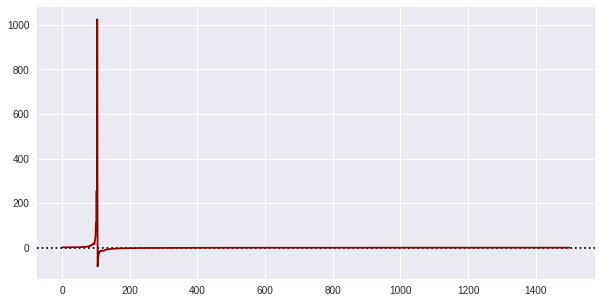

In [16]:
w_track = np.array(w_track)
b_track = np.array(b_track)

db_track = -b_track / w_track
target_db = -t_b / t_w 

fig, ax = plt.subplots(figsize=(10, 5))
ax.axhline(y=target_db, color='black', linestyle=":")
ax.plot(db_track, color='darkred')